# Q1.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K) # raw vector
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
print("xt", x_train.shape)
print("yt", y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
xt (50000, 3072)
yt (50000, 10)


In [2]:
iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-5
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w1) + b1 
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg*np.sum(w1*w1)
    loss_history.append(loss)

    if t % 10 == 0:
        print("Loss after {} iteration {}".format(t, loss))
        train_acc = 1.0 - (1/Ntr)*(np.count_nonzero(
            np.abs(np.argmax(y_pred, axis=1) - np.argmax(y, axis=1))))
        train_acc_history.append(train_acc)
        print("Training accuracy : ",train_acc)
    # Backward pass
    dy_pred = (2.0/batch_size)*(y_pred - y)
    dw1 = x.T.dot(dy_pred)  # D x K
    db1 = dy_pred.sum(axis=0) # 1 x K coloumn wise summation 

    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    lr = lr*lr_decay 

    y_pred_val = x_test.dot(w1) + b1 
    val_acc = 1.0 - (1/Nte)*(np.count_nonzero(np.argmax(y_pred_val, axis=1) - np.argmax(y_test, axis=1)))
    val_acc_history.append(val_acc)


Loss after 0 iteration 0.9999803514428695
Training accuracy :  0.12873999999999997
Loss after 10 iteration 0.8766413296494197
Training accuracy :  0.35424
Loss after 20 iteration 0.8425443798117213
Training accuracy :  0.3727999999999999
Loss after 30 iteration 0.8236198736911093
Training accuracy :  0.38203999999999994
Loss after 40 iteration 0.8123921750497638
Training accuracy :  0.38825999999999994
Loss after 50 iteration 0.8054292368451815
Training accuracy :  0.3929999999999999
Loss after 60 iteration 0.8009087721102585
Training accuracy :  0.3959999999999999
Loss after 70 iteration 0.7978244523006329
Training accuracy :  0.39886
Loss after 80 iteration 0.7956082042124722
Training accuracy :  0.40113999999999994
Loss after 90 iteration 0.7939332948022388
Training accuracy :  0.4028799999999999
Loss after 100 iteration 0.7926081945348975
Training accuracy :  0.4047599999999999
Loss after 110 iteration 0.7915182590656202
Training accuracy :  0.40593999999999997
Loss after 120 itera

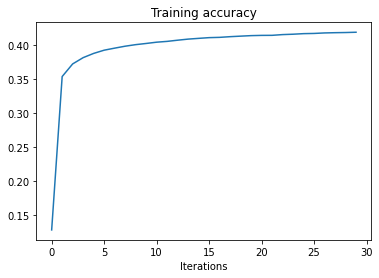

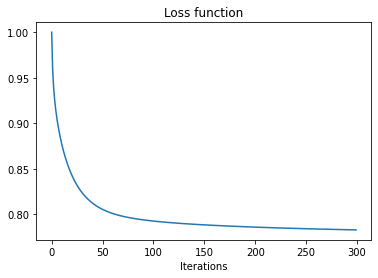

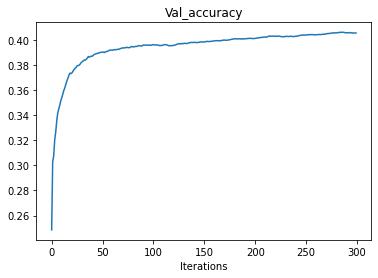

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

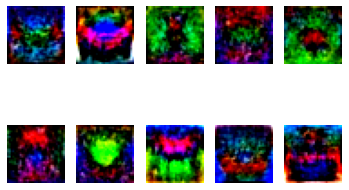

Training accuracy :  0.4195399999999999
Test accuracy :  0.40579999999999994


In [5]:
plt.plot(train_acc_history)
plt.title("Training accuracy"), plt.xlabel("Iterations")
plt.show()
plt.plot(loss_history)
plt.title("Loss function"), plt.xlabel("Iterations")
plt.show()
plt.plot(val_acc_history)
plt.title("Val_accuracy"), plt.xlabel("Iterations")
plt.show()

fg, ax = plt.subplots(2,5)

for i in range(2):
    for j in range(5):
        img = w1[:,5*i+j].reshape(32,32,3)
        ax[i,j].imshow(img*250)
        ax[i,j].axis("off")
plt.show()

y_pred = x_train.dot(w1) + b1 
train_acc = 1.0 - (1/Ntr)*(np.count_nonzero(np.argmax(y_pred, axis=1) - np.argmax(y_train, axis=1)))
print("Training accuracy : ",train_acc)
y_pred_test = x_test.dot(w1) + b1 
test_acc = 1.0 - (1/Nte)*(np.count_nonzero(np.argmax(y_pred_test, axis=1) - np.argmax(y_test, axis=1)))
print("Test accuracy : ",test_acc)

# Q2.

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print("xt", x_train.shape)
print("yt", y_train.shape)

x_train:  (50000, 32, 32, 3)
xt (50000, 3072)
yt (50000, 10)


In [13]:
H = 200
std = 1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H) # raw vector
w2 = std*np.random.randn(H,K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = Ntr

iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    #indices = np.random.choice(Ntr, batch_size)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    h = 1./(1.0 + np.exp(-x.dot(w1) - b1))
    y_pred = h.dot(w2) + b2
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg*(np.sum(w1*w1) + np.sum(w2*w2))
    loss_history.append(loss)

    if t % 10 == 0:
        print("Loss after {} iteration {}".format(t, loss))
        train_acc = 1.0 - (1/Ntr)*(np.count_nonzero(np.argmax(y_pred, axis=1) - np.argmax(y, axis=1)))
        train_acc_history.append(train_acc)
        print("Training accuracy : ",train_acc)
    # Backward pass
    dy_pred = (2.0/batch_size)*(y_pred - y)
    dw2 = h.T.dot(dy_pred) +  reg*w2 # H x K
    db2 = dy_pred.sum(axis=0) # 1 x K, coloumn wise summation 
    dh = dy_pred.dot(w2.T) # Ntr x H
    dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis = 0)

    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2
    lr = lr*lr_decay

    h1 = 1./(1.0 + np.exp(-x_test.dot(w1) - b1))
    y_pred_val = h1.dot(w2) + b2
    val_acc = 1.0 - (1/Nte)*(np.count_nonzero(np.argmax(y_pred_val, axis=1) - np.argmax(y_test, axis=1)))
    val_acc_history.append(val_acc)

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Loss after 0 iteration 1.0000272676874413
Training accuracy :  0.09999999999999998
Loss after 10 iteration 0.8701208003245662
Training accuracy :  0.20823999999999998
Loss after 20 iteration 0.8394908405045882
Training accuracy :  0.27718
Loss after 30 iteration 0.8320512454798062
Training accuracy :  0.30828
Loss after 40 iteration 0.8198852334364424
Training accuracy :  0.32853999999999994
Loss after 50 iteration 0.812086449388906
Training accuracy :  0.35029999999999994
Loss after 60 iteration 0.8070488756792822
Training accuracy :  0.3561399999999999
Loss after 70 iteration 0.8012442552413113
Training accuracy :  0.36766
Loss after 80 iteration 0.7959157770641954
Training accuracy :  0.3742399999999999
Loss after 90 iteration 0.7881014356933572
Training accuracy :  0.3862399999999999
Loss after 100 iteration 0.7847439611745922
Training accuracy :  0.3927799999999999
Loss after 110 iteration 0.7808742278354573
Training accuracy :  0

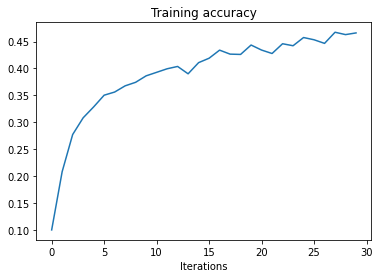

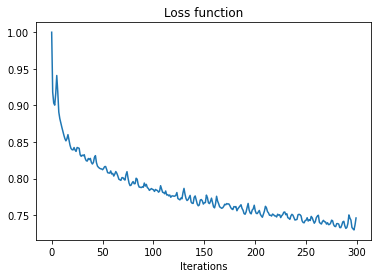

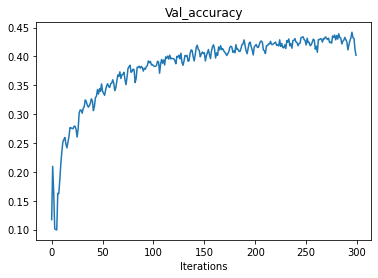

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

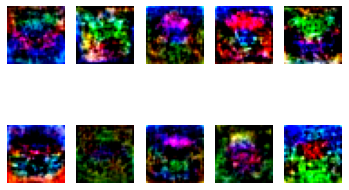

Training accuracy :  0.43526
Test accuracy :  0.40579999999999994


In [15]:
plt.plot(train_acc_history)
plt.title("Training accuracy"), plt.xlabel("Iterations")
plt.show()
plt.plot(loss_history)
plt.title("Loss function"), plt.xlabel("Iterations")
plt.show()
plt.plot(val_acc_history)
plt.title("Val_accuracy"), plt.xlabel("Iterations")
plt.show()

fg, ax = plt.subplots(2,5)

for i in range(2):
    for j in range(5):
        img = w1[:,5*i+j].reshape(32,32,3)
        ax[i,j].imshow(img*1000)
        ax[i,j].axis("off")
plt.show()

h = 1./(1 + np.exp(-x_train.dot(w1) - b1))
y_pred = h.dot(w2) + b2
train_acc = 1.0 - (1/Ntr)*(np.count_nonzero(np.argmax(y_pred, axis=1) - np.argmax(y_train, axis=1)))
print("Training accuracy : ",train_acc)
h_1 = 1./(1 + np.exp(-x_test.dot(w1) - b1))
y_pred_test = h_1.dot(w2) + b2
train_acc = 1.0 - (1/Nte)*(np.count_nonzero(np.argmax(y_pred_test, axis=1) - np.argmax(y_test, axis=1)))
print("Test accuracy : ",test_acc)

# Q3.

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
#x_train, x_test = x_train, x_test
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print("xt", x_train.shape)
print("yt", y_train.shape)

x_train:  (50000, 32, 32, 3)
xt (50000, 3072)
yt (50000, 10)


In [17]:
H = 200
std = 1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H) # raw vector
w2 = std*np.random.randn(H,K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = 500

iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
loss_n = []
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x1 = x_train[indices]
    y1 = y_train[indices]
    seed += 1
    loss_1 = []
    for st in range(0,Ntr+1, batch_size):
        # Forward pass
        end = st + batch_size
        x = x1[st:end:,]
        y = y1[st:end:,]
        z = x.dot(w1) + b1
        # avoiding overflow
        with np.errstate(over='ignore', invalid='ignore'):
              h = np.where(z >= 0,
                  1 / (1 + np.exp(-z)),
                  np.exp(z) / (1 + np.exp(z)))
        y_pred = h.dot(w2) + b2

        loss = 1./batch_size*np.square(y_pred - y).sum() + reg*(np.sum(w1*w1) + np.sum(w2*w2))
        loss_1.append(loss)
        loss_n.append(loss)
        # Backward pass
        dy_pred = (2.0/batch_size)*(y_pred - y)
        dw2 = h.T.dot(dy_pred) +  reg*w2 # H x K
        db2 = dy_pred.sum(axis=0) # 1 x K, coloumn wise summation 
        dh = dy_pred.dot(w2.T) # Ntr x H
        dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
        db1 = (dh*h*(1-h)).sum(axis = 0)

        w1 = w1 - lr*dw1
        b1 = b1 - lr*db1
        w2 = w2 - lr*dw2
        b2 = b2 - lr*db2

    lr = lr*lr_decay
    loss_avg = np.average(loss_1)
    loss_history.append(loss_avg)
    if t % 10 == 0:
        print("Loss after {} iteration {}".format(t, loss_avg))
        z = x1.dot(w1) + b1
        with np.errstate(over='ignore', invalid='ignore'):
              h = np.where(z >= 0,
                          1 / (1 + np.exp(-z)),
                          np.exp(z) / (1 + np.exp(z)))
        y_pred = h.dot(w2) + b2
        train_acc = 1.0 - (1/Ntr)*(np.count_nonzero(np.argmax(y_pred, axis=1) - np.argmax(y1, axis=1)))
        train_acc_history.append(train_acc)
        print("Training accuracy : ",train_acc)

    h1 = 1./(1.0 + np.exp(-x_test.dot(w1) - b1))
    y_pred_val = h1.dot(w2) + b2
    val_acc = 1.0 - (1/Nte)*(np.count_nonzero(np.argmax(y_pred_val, axis=1) - np.argmax(y_test, axis=1)))
    val_acc_history.append(val_acc)

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Loss after 0 iteration 0.823120415685059
Training accuracy :  0.37134
Loss after 10 iteration 0.7099853013695401
Training accuracy :  0.5071399999999999
Loss after 20 iteration 0.6737216817228822
Training accuracy :  0.55412
Loss after 30 iteration 0.6466416472365623
Training accuracy :  0.5921
Loss after 40 iteration 0.6226765707532489
Training accuracy :  0.6346799999999999
Loss after 50 iteration 0.6025096220366086
Training accuracy :  0.66462
Loss after 60 iteration 0.5845243465576421
Training accuracy :  0.6909799999999999
Loss after 70 iteration 0.5652169415327083
Training accuracy :  0.71054
Loss after 80 iteration 0.5488853028134086
Training accuracy :  0.73398
Loss after 90 iteration 0.534707683317392
Training accuracy :  0.7540199999999999
Loss after 100 iteration 0.5195104568588156
Training accuracy :  0.76706
Loss after 110 iteration 0.5074768849781316
Training accuracy :  0.7856799999999999
Loss after 120 iteration 0.49700

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: overflow encountered in exp


Loss after 220 iteration 0.41338880457262783
Training accuracy :  0.8828
Loss after 230 iteration 0.4088933270445699
Training accuracy :  0.87934
Loss after 240 iteration 0.40150070978460367
Training accuracy :  0.88986
Loss after 250 iteration 0.3986392866029428
Training accuracy :  0.89308
Loss after 260 iteration 0.39139542216157824
Training accuracy :  0.8904
Loss after 270 iteration 0.3868918448503097
Training accuracy :  0.8954
Loss after 280 iteration 0.3821401195046268
Training accuracy :  0.8999
Loss after 290 iteration 0.37757438057289194
Training accuracy :  0.9055


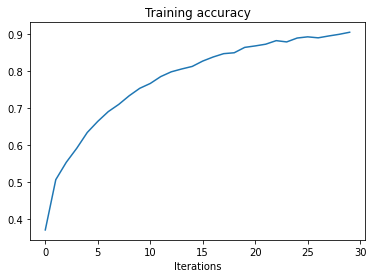

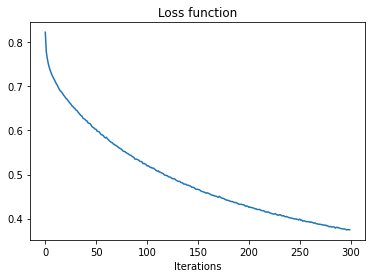

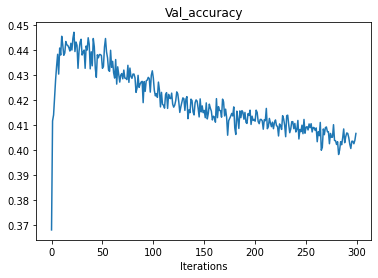

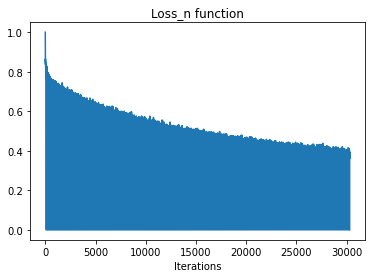

Training accuracy :  0.9076
Test accuracy :  0.40659999999999996


In [18]:
plt.plot(train_acc_history)
plt.title("Training accuracy"), plt.xlabel("Iterations")
plt.show()
plt.plot(loss_history)
plt.title("Loss function"), plt.xlabel("Iterations")
plt.show()
plt.plot(val_acc_history)
plt.title("Val_accuracy"), plt.xlabel("Iterations")
plt.show()

plt.plot(loss_n)
plt.title("Loss_n function"), plt.xlabel("Iterations")
plt.show()

z = x_train.dot(w1) + b1
with np.errstate(over='ignore', invalid='ignore'):
      h = np.where(z >= 0,
                  1 / (1 + np.exp(-z)),
                  np.exp(z) / (1 + np.exp(z)))
y_pred = h.dot(w2) + b2
train_acc = 1.0 - (1/Ntr)*(np.count_nonzero(np.argmax(y_pred, axis=1) - np.argmax(y_train, axis=1)))
print("Training accuracy : ",train_acc)

z1 = x_test.dot(w1) + b1
with np.errstate(over='ignore', invalid='ignore'):
      h = np.where(z1 >= 0,
                  1 / (1 + np.exp(-z1)),
                  np.exp(z1) / (1 + np.exp(z1)))
y_pred_test = h.dot(w2) + b2

test_acc = 1.0 - (1/Nte)*(np.count_nonzero(np.argmax(y_pred_test, axis=1) - np.argmax(y_test, axis=1)))
print("Test accuracy : ",test_acc)

170500096/170498071 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
______________________________________________________

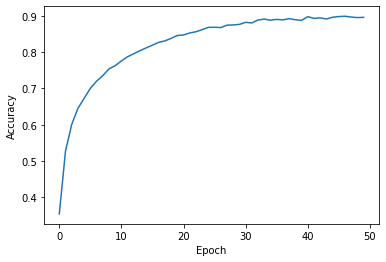

313/313 - 1s - loss: 1.6917 - accuracy: 0.6687

Test accuracy =  0.6686999797821045


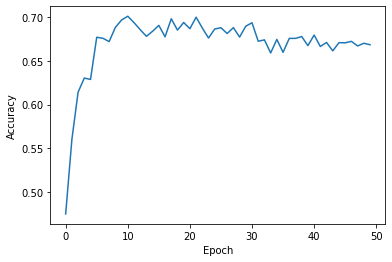

In [ ]:

%matplotlib inline 
%load_ext tensorboard
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
import numpy as np 
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = tf.dtypes.cast(x_train, tf.float32)
x_test = tf.dtypes.cast(x_test, tf.float32)
#x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
x_train, x_test = x_train/255., x_test/255.

model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10))

model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.9),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
    metrics= ["accuracy"]
)
print(model.summary())
history = model.fit(x_train, y_train, epochs=50,batch_size=50,validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)

print("\nTest accuracy = ", test_acc)


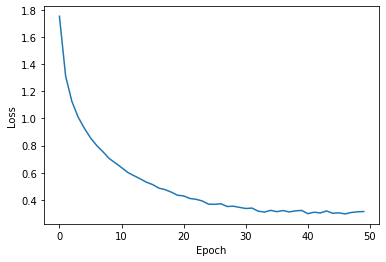

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()